# PRCP-1002 HANDWRITTEN DIGITS CLASSIFICATION

## 1. Introduction

**The MNIST dataset (Modified National Institute of Standards and Technology)** is one of the most well-known datasets in the field of machine learning and computer vision especially used for image classification tasks. Here's an overview of its content: 


- **70,000** grayscale images of handwritten digits (0–9)
- **60,000** for training
- **10,000** for testing

Each image is:
- **28×28 pixels** (784 features if flattened)
- **Grayscale** (pixel values range from 0 to 255)
- **Label**: A number (0 through 9) indicating the digit in the image

## 2. Import Required Libraries

In [1]:
import tensorflow
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.utils import to_categorical

## 3. Loading the Dataset

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

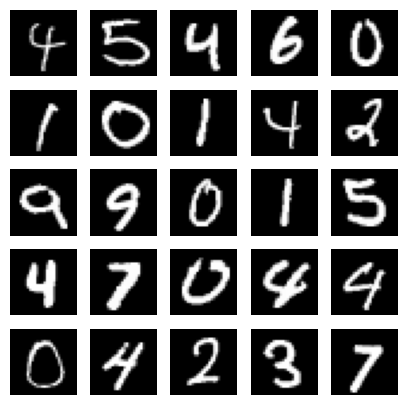

In [3]:
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='grey')
    plt.xlabel(labels)
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

## 4. Data Preprocessing

In [7]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255


In [8]:
x_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [9]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
x_train.shape

(60000, 28, 28, 1)

In [11]:
x_test.shape

(10000, 28, 28, 1)

In [12]:
y_train.shape

(60000,)

In [13]:
y_test.shape

(10000,)

In [14]:
#One Hot Encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## 5. Building and Training the Model

### 5.1 CNN Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [16]:
model = Sequential()

# First convolution + pooling
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolution + pooling
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

C:\Users\temp0\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=5,
    validation_split=0.1,
    verbose=1
)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.7983 - loss: 0.6446 - val_accuracy: 0.9830 - val_loss: 0.0599
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9700 - loss: 0.0987 - val_accuracy: 0.9862 - val_loss: 0.0508
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9802 - loss: 0.0660 - val_accuracy: 0.9870 - val_loss: 0.0460
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9848 - loss: 0.0494 - val_accuracy: 0.9900 - val_loss: 0.0380
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9863 - loss: 0.0463 - val_accuracy: 0.9903 - val_loss: 0.0338


In [19]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

Test Loss: 0.02601560391485691
Test Accuracy: 0.9911999702453613


### 5.2. SVM 

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [21]:
x_train.shape

(60000, 28, 28, 1)

In [22]:
x_train_svm = x_train.reshape(-1, 28 * 28)
x_test_svm = x_test.reshape(-1, 28 * 28)

In [23]:
x_train_svm.shape

(60000, 784)

In [24]:
x_train_svm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_svm = scaler.fit_transform(x_train_svm)
x_test_svm = scaler.transform(x_test_svm)

In [26]:
#Converting One Hot Encoded Values to Integer Values
y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

In [27]:
y_train_int

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

In [28]:
svm = SVC(verbose=True)


In [29]:
x_train_small = x_train_svm[:10000]
y_train_small = y_train_int[:10000]
x_test_small = x_test_svm[:1000]
y_test_small = y_test_int[:1000]

In [30]:
#Training the Model with 10000 samples
svm.fit(x_train_small, y_train_small)

[LibSVM]

SVC(verbose=True)

In [31]:
y_pred = svm.predict(x_test_small)

print("✅ Accuracy:", accuracy_score(y_test_small, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test_small, y_pred))

✅ Accuracy: 0.926

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        85
           1       0.99      0.99      0.99       126
           2       0.95      0.91      0.93       116
           3       0.92      0.93      0.92       107
           4       0.94      0.92      0.93       110
           5       0.95      0.90      0.92        87
           6       0.95      0.92      0.94        87
           7       0.83      0.94      0.88        99
           8       0.91      0.90      0.90        89
           9       0.90      0.86      0.88        94

    accuracy                           0.93      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.93      0.93      0.93      1000



In [32]:
# Training the model with Complete Dataset
svm.fit(x_train_svm, y_train_int)

[LibSVM]

SVC(verbose=True)

In [33]:
y_pred_svm = svm.predict(x_test_svm)

print("✅ Accuracy:", accuracy_score(y_test_int, y_pred_svm))
print("\n📊 Classification Report:\n", classification_report(y_test_int, y_pred_svm))

✅ Accuracy: 0.9661

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.96      0.96      0.96       892
           6       0.98      0.97      0.98       958
           7       0.93      0.96      0.94      1028
           8       0.96      0.95      0.96       974
           9       0.97      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



### 5.3. KNN

Best k: 3


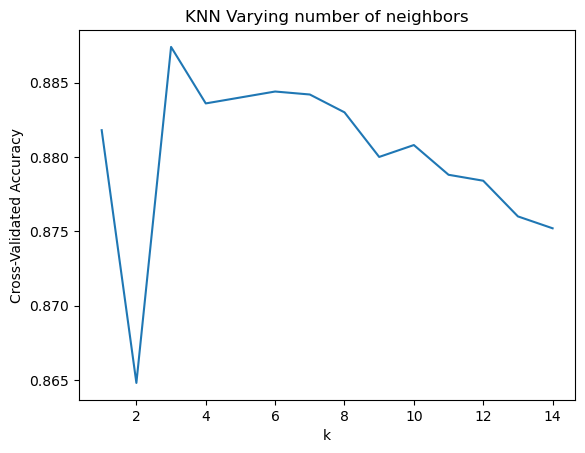

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Try values from 1 to 30
k_range = range(1,15)
cv_scores = []
x_train_small = x_train_svm[:5000]
y_train_small = y_train_int[:5000]

# Perform 5-fold cross-validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train_small, y_train_small, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the best k
best_k = k_range[np.argmax(cv_scores)]
print(f"Best k: {best_k}")

# Plot accuracy vs k
plt.plot(k_range, cv_scores)
plt.xlabel('k')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Varying number of neighbors')
plt.show()


In [35]:
# Training the model with 10000 samples
x_train_small = x_train_svm[:10000]
y_train_small = y_train_int[:10000]

In [37]:

# 5. Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can try different values for k
knn.fit(x_train_small, y_train_small)

# 6. Predict and evaluate
y_pred_knn = knn.predict(x_test_small)

print("✅ Accuracy:", accuracy_score(y_test_small, y_pred_knn))
print("\n📊 Classification Report:\n", classification_report(y_test_small, y_pred_knn))


✅ Accuracy: 0.89

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92        85
           1       0.90      0.99      0.94       126
           2       0.93      0.85      0.89       116
           3       0.86      0.93      0.89       107
           4       0.92      0.89      0.90       110
           5       0.95      0.80      0.87        87
           6       0.98      0.92      0.95        87
           7       0.87      0.88      0.87        99
           8       0.84      0.79      0.81        89
           9       0.81      0.83      0.82        94

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



In [38]:
# Training the Model with complete Dataset
knn = KNeighborsClassifier(n_neighbors=5)  # You can try different values for k
knn.fit(x_train_svm, y_train_int)

# 6. Predict and evaluate
y_pred_knn = knn.predict(x_test_svm)

print("✅ Accuracy:", accuracy_score(y_test_int, y_pred_knn))
print("\n📊 Classification Report:\n", classification_report(y_test_int, y_pred_knn))

✅ Accuracy: 0.9443

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.99      0.97      1135
           2       0.96      0.93      0.94      1032
           3       0.92      0.95      0.94      1010
           4       0.94      0.94      0.94       982
           5       0.93      0.92      0.93       892
           6       0.96      0.97      0.97       958
           7       0.94      0.92      0.93      1028
           8       0.96      0.90      0.93       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



## 6. Model Comaprison Report

In [39]:
print("CNN Accuracy:", score[1])
print("SVM Accuracy:", accuracy_score(y_test_int, y_pred_svm))
print("KNN Accuracy:", accuracy_score(y_test_int, y_pred_knn))


CNN Accuracy: 0.9911999702453613
SVM Accuracy: 0.9661
KNN Accuracy: 0.9443


## 7. Conclusion

Various classification models, including CNN, SVM, and KNN, were applied to the MNIST dataset. Among them, the CNN model achieved the highest accuracy, reaching 99%. This demonstrates the strong effectiveness of CNNs in image classification tasks.